<a href="https://colab.research.google.com/github/kapilsarma2002/blood-cell-classification/blob/master/blood_cell_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/Yolo/BCCD/archive.zip


Archive:  /content/gdrive/MyDrive/Yolo/BCCD/archive.zip
  inflating: BCCD_Dataset-master/.gitignore  
  inflating: BCCD_Dataset-master/BCCD/Annotations/BloodImage_00000.xml  
  inflating: BCCD_Dataset-master/BCCD/Annotations/BloodImage_00001.xml  
  inflating: BCCD_Dataset-master/BCCD/Annotations/BloodImage_00002.xml  
  inflating: BCCD_Dataset-master/BCCD/Annotations/BloodImage_00003.xml  
  inflating: BCCD_Dataset-master/BCCD/Annotations/BloodImage_00004.xml  
  inflating: BCCD_Dataset-master/BCCD/Annotations/BloodImage_00005.xml  
  inflating: BCCD_Dataset-master/BCCD/Annotations/BloodImage_00006.xml  
  inflating: BCCD_Dataset-master/BCCD/Annotations/BloodImage_00007.xml  
  inflating: BCCD_Dataset-master/BCCD/Annotations/BloodImage_00008.xml  
  inflating: BCCD_Dataset-master/BCCD/Annotations/BloodImage_00009.xml  
  inflating: BCCD_Dataset-master/BCCD/Annotations/BloodImage_00010.xml  
  inflating: BCCD_Dataset-master/BCCD/Annotations/BloodImage_00011.xml  
  inflating: BCCD_Data

In [ ]:
import os
import shutil

# if os.path.exists(os.path.dirname('/content/BCCD_Dataset')):
if os.path.isdir('/content/BCCD_Dataset'): shutil.rmtree('/content/BCCD_Dataset', ignore_errors=False, onerror=None)

os.rename('/content/BCCD_Dataset-master', '/content/BCCD_Dataset')


In [ ]:
# Linear Algebra
import numpy as np

# File Handling
import os
import shutil
import xml.etree.ElementTree as ET
   
# To Free memory
import gc

# Image processing libraries
from PIL import Image
import matplotlib.pyplot as plt

path = os.path.join('/content', 'Dataset')
if not os.path.exists(os.path.dirname(path)): #shutil.rmtree(path, ignore_errors=False, onerror=None)
  os.mkdirs(os.path.dirname(path))

In [ ]:
# Variables
Input_Folder = '/content/BCCD_Dataset/'
Files_Split_Info = Input_Folder + 'BCCD/ImageSets/Main/'
Images =  Input_Folder + 'BCCD/JPEGImages/'
Annotations = Input_Folder + 'BCCD/Annotations/'
Yolo_Annotations = Input_Folder + 'AnnotLabels/'

# Base Location for Image and Annotation files
Destination_Path = '/content/Dataset/'
Destination_Images_Path = os.path.join(Destination_Path, 'images')
# Destination_Images_Path = Destination_Path + 'images/'
Destination_Labels_Path = os.path.join(Destination_Path, 'labels')
# Destination_Labels_Path = Destination_Path + 'labels/'

classes = [ 'RBC', 'WBC', 'Platelets']

In [ ]:
# Check if directory exists and if not, create it and the child directories
if not(os.path.isdir(Destination_Images_Path)):
    os.makedirs(Destination_Images_Path)    
    # Child directories
    os.mkdir(Destination_Images_Path + '/train')
    os.mkdir(Destination_Images_Path + '/val')
    os.mkdir(Destination_Images_Path + '/test')
        
# Check if directory exists and if not, create it and the child directories
if not(os.path.isdir(Destination_Labels_Path)):
    os.makedirs(Destination_Labels_Path)    
    # Child directories
    os.mkdir(Destination_Labels_Path + '/train')
    os.mkdir(Destination_Labels_Path + '/val') 
    os.mkdir(Destination_Labels_Path + '/test')

In [ ]:
def format(width, height, box):

    # x1 = 'x' upper-left; y1 = 'y' upper-left; x2 = 'x' lower-right; y2 = 'y' lower-right; 
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    # normalizing values
    dw = np.float32(1. / int(width))
    dh = np.float32(1. / int(height))

    # Get the center coordinates
    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    # Normalize data
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return x, y, w, h

In [ ]:
# Convert Annotations into Yolo5 format and save the files
def create_annotations(InputFile, DestPath):
  File_Contents = ET.parse(InputFile)

  # Check if directory exists and if not, create it and the child directories
  if not(os.path.isdir(DestPath)):
    os.mkdir(DestPath)  

  # Get the root element
  root = File_Contents.getroot()
  
  # Element 1 is Filename and we want the filename without the extension as we will add one
  File_Name = root[1].text[:-4]+ ".txt"  

  # Element 4 is size and it has Width and Depth
  Img_width = root[4][0].text            
  Img_Height = root[4][1].text

  # Loop through all 'Object' elements. This has inputs on classes and bouding box co-ordinates
  boxes = []
  for info in root.findall('object'):
    img_class = info[0].text
    x1 = info[4][0].text
    y1 = info[4][1].text
    x2 = info[4][2].text
    y2 = info[4][3].text
  boxes.append([img_class, x1, y1, x2, y2])

  # Save the annotation text file
  str_Dest_Path = DestPath + File_Name
  strFile = open(str_Dest_Path, "a+")
  for box in boxes:
    cls = classes.index(box[0])
    x,y,w,h = format(Img_width, Img_Height, box[1:])
    strFile.write(f"{cls} {x} {y} {w} {h}\n")

  strFile.flush()
  strFile.close() 

In [ ]:
for annotfile in os.listdir(Annotations):
  create_annotations(Annotations + annotfile, Yolo_Annotations)

In [ ]:
# Check if we have processed all annotation files in source folder and in the destination folder
len(os.listdir(Annotations)) == len(os.listdir(Yolo_Annotations))

True

In [ ]:
# Use the 'splits' and move respective image and annotations to right folder
for file in os.listdir(Files_Split_Info):

  if 'trainval' in file:
    pass
    
  elif 'train' in file:
    print('Training file: ', Files_Split_Info + file)
    with open(Files_Split_Info + file, 'r') as input_file:
      for current_file in input_file:
        shutil.copy(Images + current_file.strip() + '.jpg', Destination_Images_Path + '/train/' )
        shutil.copy(Yolo_Annotations + current_file.strip()  + '.txt', Destination_Labels_Path + '/train/' )

  elif 'val' in file:
    print('Validation file: ', Files_Split_Info + file)
    with open(Files_Split_Info + file, 'r') as input_file:
      for current_file in input_file:
        shutil.copy(Images + current_file.strip() + '.jpg', Destination_Images_Path + '/val/' )
        shutil.copy(Yolo_Annotations + current_file.strip() + '.txt', Destination_Labels_Path + '/val/' )

  elif 'test' in file:
    print('Testing file: ', Files_Split_Info + file)
    with open(Files_Split_Info + file, 'r') as input_file:
      for current_file in input_file:
        shutil.copy(Images + current_file.strip() + '.jpg', Destination_Images_Path + '/test/' )
        shutil.copy(Yolo_Annotations + current_file.strip() + '.txt', Destination_Labels_Path + '/test/' )

Training file:  /content/BCCD_Dataset/BCCD/ImageSets/Main/train.txt
Validation file:  /content/BCCD_Dataset/BCCD/ImageSets/Main/val.txt
Testing file:  /content/BCCD_Dataset/BCCD/ImageSets/Main/test.txt


In [ ]:
# Print records count
print('Total Training Images: {}'.format(len(os.listdir(Destination_Images_Path + '/train/'))))
print('Total Validation Images: {}'.format(len(os.listdir(Destination_Images_Path + '/val/'))))
print('Total Test Images: {}'.format(len(os.listdir(Destination_Images_Path + '/test/'))))

Total Training Images: 205
Total Validation Images: 87
Total Test Images: 72


In [ ]:
# Check file count in source and destination (ie: in 'train', 'valid' and 'test' folders)
print(len(os.listdir(Destination_Images_Path + '/train/')) == len(os.listdir(Destination_Labels_Path + '/train/')))
print(len(os.listdir(Destination_Images_Path + '/val/')) == len(os.listdir(Destination_Labels_Path + '/val/' )))
print(len(os.listdir(Destination_Images_Path + '/test/')) == len(os.listdir(Destination_Labels_Path + '/test/' )))

True
True
True


In [ ]:
# Read a sample annotation file. Contents are:  'Class','x','y','W','H '
with open ('/content/Dataset/labels/train/BloodImage_00001.txt','r') as annot:
    for content in annot:
      print(content.rstrip())

0 0.8046875119907781 0.5500000286847353 0.15937500237487257 0.2291666786186397


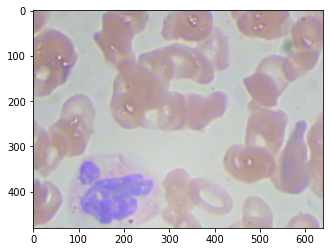

In [ ]:
# View a sample image
img = Image.open('/content/Dataset/images/train/BloodImage_00001.jpg')
plt.imshow(img)

In [ ]:
# Sample .yaml file for Yolo. Format is:

# train: path to train folder containing images
# val: path to val folder containing images
# nc: the number of classes
# names: the names of the classes

In [ ]:
# Create the .yaml file required for Yolo
# Since we would be inside Yolo directory, we use '..' to move to parent directory and then into sub directories for images and labels
with open(Destination_Path + 'dataset.yaml', 'w') as file:
    file.write("train: " + "../Dataset/images/train/\n")
    file.write("val: " + "../Dataset/images/val/\n")
    file.write("\n")
    file.write("nc: 3\n")
    file.write("\n")
    file.write("names: ['RBC', 'WBC', 'Platelets']")    

In [ ]:
# Install Yolo 5 and dependencies
!rm -rf yolov5
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14194, done.
remote: Total 14194 (delta 0), reused 0 (delta 0), pack-reused 14194
Receiving objects: 100% (14194/14194), 13.23 MiB | 26.99 MiB/s, done.
Resolving deltas: 100% (9812/9812), done.


In [ ]:
!pwd
!ls
%cd yolov5
!pwd

/content
BCCD_Dataset  Dataset  gdrive  sample_data  yolov5
/content/yolov5
/content/yolov5


In [ ]:
# Install necessary files
! pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.2 MB/s 


In [ ]:
# Move the .yaml file to yolo folder
shutil.move(Destination_Path + 'dataset.yaml', '/content/yolov5' )

'/content/yolov5/dataset.yaml'

In [ ]:
# Weights from https://github.com/ultralytics/yolov5/releases
shutil.copy('/content/gdrive/MyDrive/yolov5s.pt', '/content/yolov5/yolov5s.pt')

'/content/yolov5/yolov5s.pt'

In [ ]:
gc.collect()

534

In [ ]:
!python train.py --img 640  --batch 8 --epochs 20 --data dataset.yaml --weights yolov5s.pt  --cache  

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-196-ge42c89d Python-3.7.14 torch-1.12.1+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.

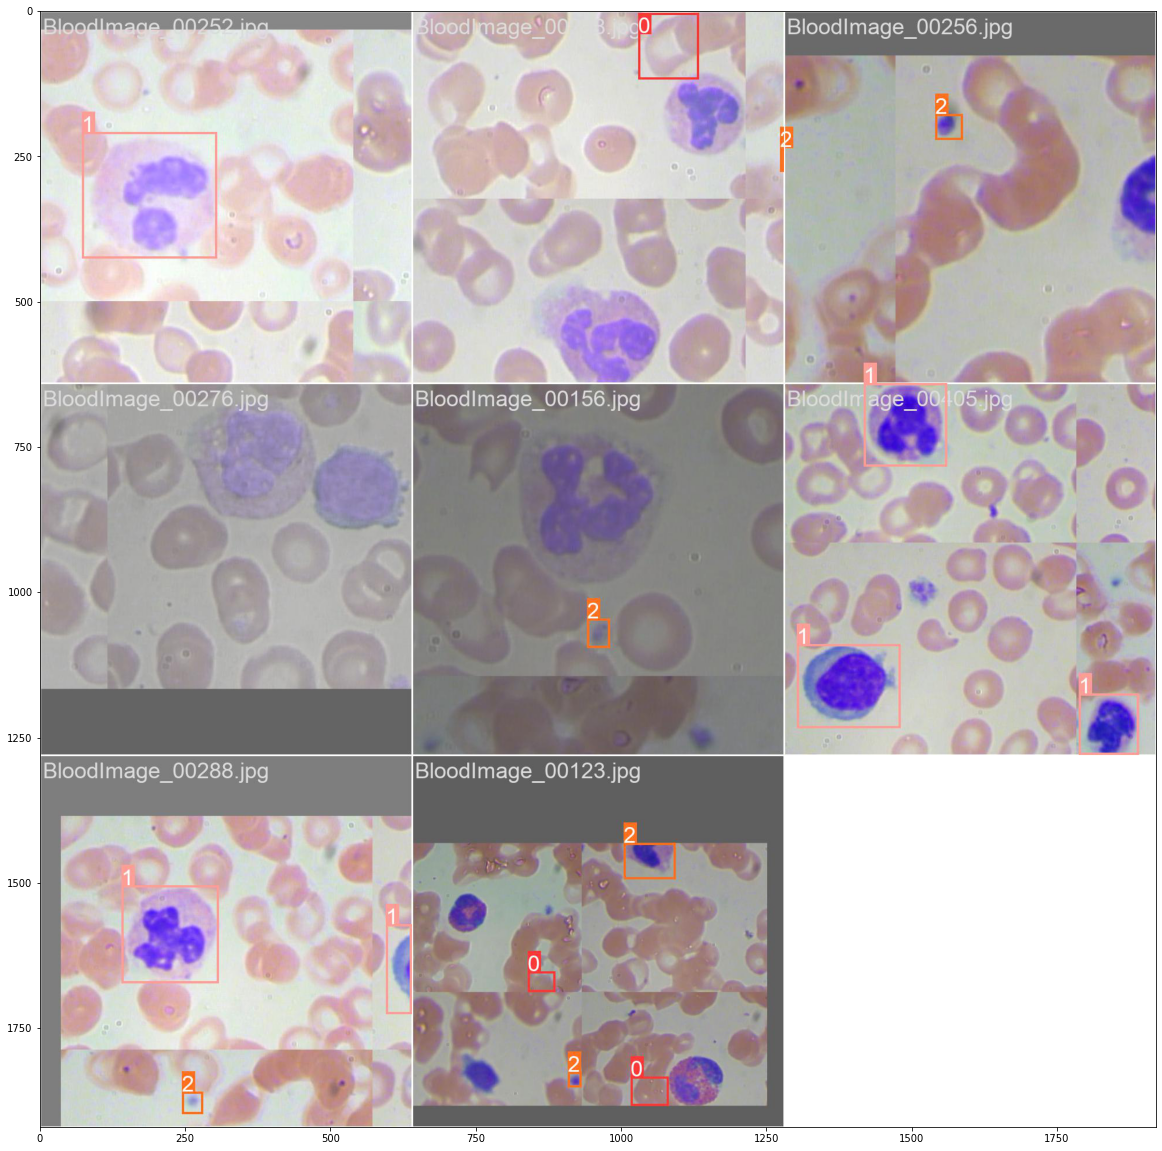

In [ ]:
img = Image.open('/content/yolov5/runs/train/exp/train_batch0.jpg')
plt.figure(figsize=(20,35))
plt.imshow(img)